# Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Spliting the dataset

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Applying the Feature scale on the data

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the machine learning algorithm to create the model

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

# Predicting the result

In [7]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


# Getting the Predicted results

In [8]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


# Evaluating the performance

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55  3]
 [ 1 21]]


0.95

# Visualizing the results on Training data

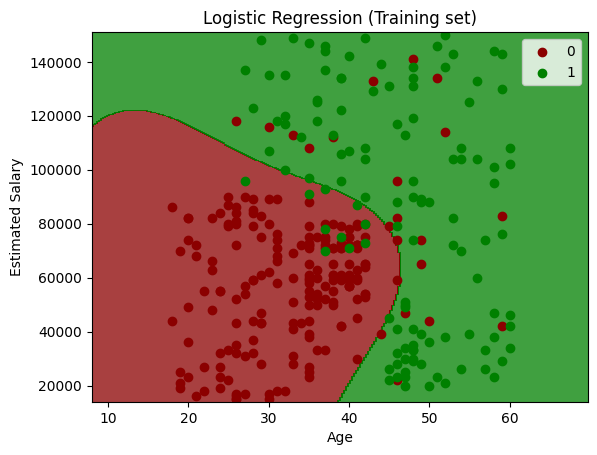

In [16]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Inverse transform the scaled training data to the original feature space
X_set, y_set = sc.inverse_transform(x_train), y_train

# Create a mesh grid for visualizing the decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25)
)

# Predict the classifier output for each point in the mesh grid
# Apply scaling to the mesh grid and reshape predictions to match the grid's shape
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

# Plot the decision boundary with contour
# Make sure the colors are based on the actual unique classes in your target variable
cmap = ListedColormap(['darkred', 'green'])  # or use 'red', 'blue', etc.
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)

# Set the axis limits to match the mesh grid
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot the actual training data points
# Color the points based on their class labels
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=[cmap(i)], label=j  # Use the cmap to get consistent coloring
    )

# Add titles and labels
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Display the legend and show the plot
plt.legend()
plt.show()


# Visualizing the results on test set

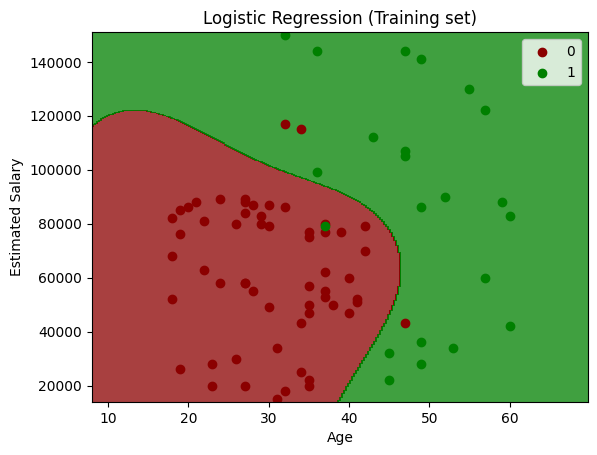

In [10]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Inverse transform the scaled training data to the original feature space
X_set, y_set = sc.inverse_transform(x_test), y_test

# Create a mesh grid for visualizing the decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25)
)

# Predict the classifier output for each point in the mesh grid
# Apply scaling to the mesh grid and reshape predictions to match the grid's shape
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

# Plot the decision boundary with contour
# Make sure the colors are based on the actual unique classes in your target variable
cmap = ListedColormap(['darkred', 'green'])  # or use 'red', 'blue', etc.
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)

# Set the axis limits to match the mesh grid
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot the actual training data points
# Color the points based on their class labels
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=[cmap(i)], label=j  # Use the cmap to get consistent coloring
    )

# Add titles and labels
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Display the legend and show the plot
plt.legend()
plt.show()